In [1]:
# keras modules
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print('shape of x_train' , x_train.shape)
print('shape of y_train' , y_train.shape)
print('shape of x_test' , x_test.shape)
print('shape of y_test' , y_test.shape)


shape of x_train (60000, 28, 28)
shape of y_train (60000,)
shape of x_test (10000, 28, 28)
shape of y_test (10000,)


## Show a data item

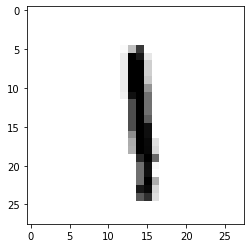

In [5]:
import matplotlib.pyplot as plt
digit=x_train[8]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## Data preprocessing

In [6]:
# compute the number of labels
number_labels=len(np.unique(y_train))
number_labels

10

In [7]:
# convert y_train & y_test to one-hot vector
y_train_2=to_categorical(y_train)
y_test_2=to_categorical(y_test)

In [8]:
print('y_train before : ' ,y_train.shape )
print('y_train after : ' , y_train_2.shape)

y_train before :  (60000,)
y_train after :  (60000, 10)


## Adjust the dimensions to fit the network.

In [9]:
print('x_train.shape :' , x_train.shape)
image_size=x_train.shape[1]
print('image size : ', image_size)

x_train.shape : (60000, 28, 28)
image size :  28


### resizeing & normalization

In [10]:
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [11]:
print('x_train after :',x_train.shape)
print('x_test after :' , x_test.shape)

x_train after : (60000, 28, 28, 1)
x_test after : (10000, 28, 28, 1)


## network parameters

In [12]:
inputs_shape=(image_size,image_size ,1)
batch_size=128
kernel_size=3
pool_size=2
filters=64
dropout=0.2

I will now build a set of mods for the coiled neural network with different structures and then assemble them into one model, then I will work on compiling the results and choosing the best output among them through a statistically significant method.

## The first model is a convolutional neural network.

In [41]:
import tensorflow
from tensorflow import keras
from keras import layers
from tensorflow.keras.utils import  plot_model

In [24]:
def get_model_1():
  inputs=keras.Input(shape=inputs_shape,name='img')
  x=layers.Conv2D(filters=filters,
                        kernel_size=kernel_size,
                        activation='relu')(inputs)
  x=layers.MaxPooling2D(pool_size)(x)
  x=layers.Conv2D(filters=filters,
                        kernel_size=kernel_size,
                        activation='relu')(x)
  x=layers.MaxPooling2D(pool_size)(x)
  x=layers.Conv2D(filters=filters,
                        kernel_size=kernel_size,
                        activation='relu')(x)
  x=layers.Flatten()(x)
  x=layers.Dropout(dropout)(x)
  x=layers.Dense(number_labels)(x)
  output_model_1=layers.Activation('softmax')(x)
  return keras.Model(inputs,output_model_1, name='model_1')

In [29]:
def get_model_2():
  inputs=keras.Input(shape=inputs_shape,name='img')
  x=layers.Conv2D(filters=16,
                        kernel_size=kernel_size,
                        activation='relu')(inputs)
  x=layers.Conv2D(filters=32,
                        kernel_size=kernel_size,
                        activation='relu')(x)
  x=layers.MaxPooling2D(pool_size)(x)
  x=layers.Conv2D(filters=32,
                        kernel_size=kernel_size,
                        activation='relu')(x)
  x=layers.Conv2D(filters=16,
                        kernel_size=kernel_size,
                        activation='relu')(x)
  x=layers.MaxPooling2D(pool_size)(x)
  x=layers.Conv2D(filters=16,
                        kernel_size=kernel_size,
                        activation='relu')(x)
  x=layers.Flatten()(x)
  x=layers.Dropout(0.3)(x)
  x=layers.Dense(number_labels)(x)
  output_model_2=layers.Activation('softmax')(x)
  return keras.Model(inputs,output_model_2, name='model_2')


In [33]:
def get_model_3():
  inputs=keras.Input(shape=inputs_shape,name='img')
  x=layers.Conv2D(filters=32,
                        kernel_size=kernel_size,
                        activation='relu')(inputs)
  x=layers.MaxPooling2D(pool_size)(x)
  x=layers.Conv2D(filters=16,
                        kernel_size=kernel_size,
                        activation='relu')(x)
  x=layers.Flatten()(x)
  x=layers.Dropout(0.05)(x)
  x=layers.Dense(number_labels)(x)
  output_model_3=layers.Activation('softmax')(x)
  return keras.Model(inputs,output_model_3, name='model_3')

## Let's start assembling

In [55]:
model_1=get_model_1()
model_2=get_model_2()
model_3=get_model_3()

inputs=keras.Input(shape=inputs_shape , name='image')
y_1=model_1(inputs)
y_2=model_2(inputs)
y_3=model_3(inputs)

outputs=layers.average([y_1,y_2,y_3])
ensemble_model=keras.Model(inputs=inputs , outputs=outputs)


In [56]:
ensemble_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 model_1 (Functional)           (None, 10)           80266       ['image[0][0]']                  
                                                                                                  
 model_2 (Functional)           (None, 10)           21642       ['image[0][0]']                  
                                                                                                  
 model_3 (Functional)           (None, 10)           24314       ['image[0][0]']                  
                                                                                            

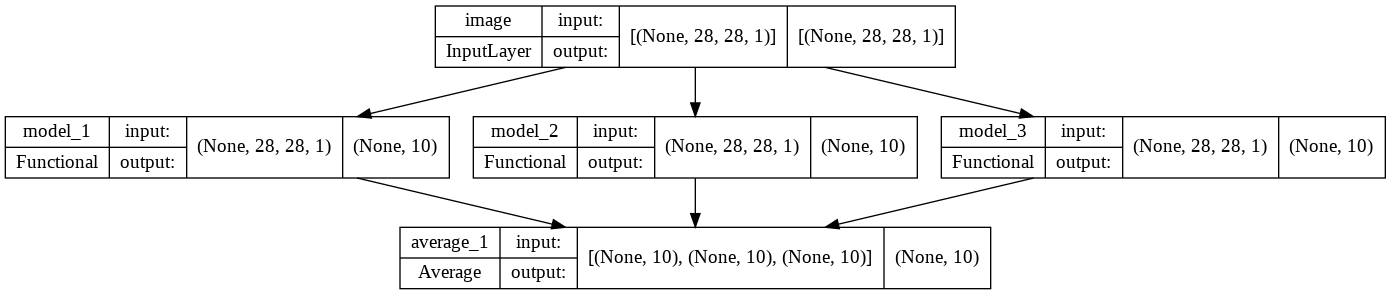

In [57]:
plot_model(ensemble_model, to_file='ensemble_model.png', show_shapes=True)

In [58]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_41 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 3, 3, 64)          3692

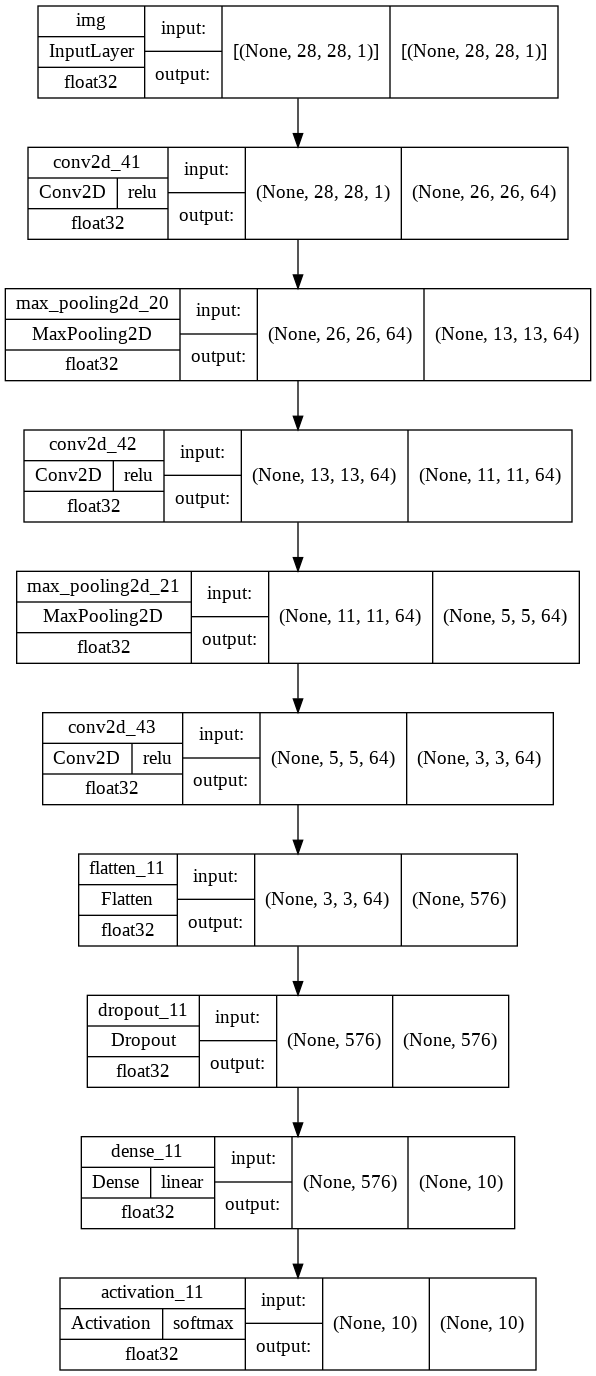

In [59]:
plot_model(model_1,to_file='model_1.png' ,show_shapes=True,show_dtype=True ,show_layer_activations=True)

In [60]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_44 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 conv2d_45 (Conv2D)          (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 10, 10, 32)        9248      
                                                                 
 conv2d_47 (Conv2D)          (None, 8, 8, 16)          4624      
                                                           

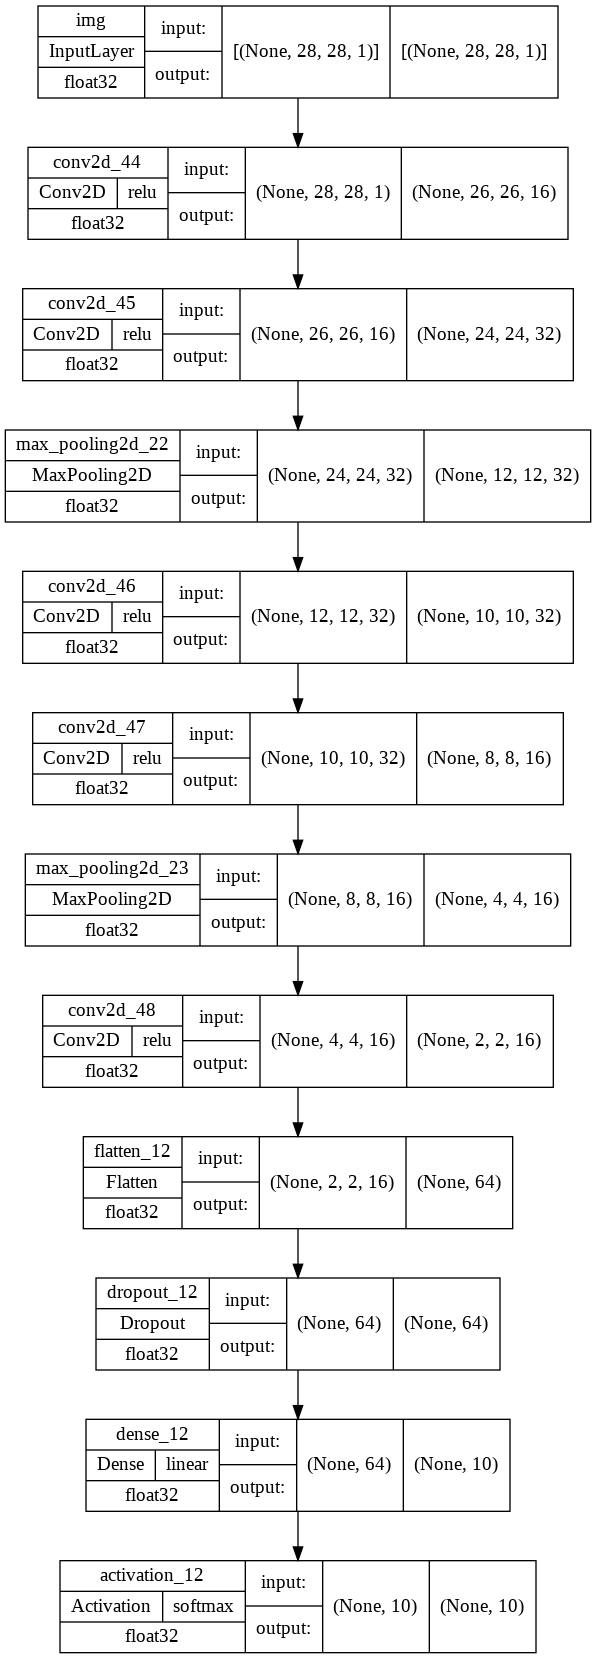

In [61]:
plot_model(model_2,to_file='model_2.png' ,show_shapes=True,show_dtype=True ,show_layer_activations=True)

In [62]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_49 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 11, 11, 16)        4624      
                                                                 
 flatten_13 (Flatten)        (None, 1936)              0         
                                                                 
 dropout_13 (Dropout)        (None, 1936)              0         
                                                           

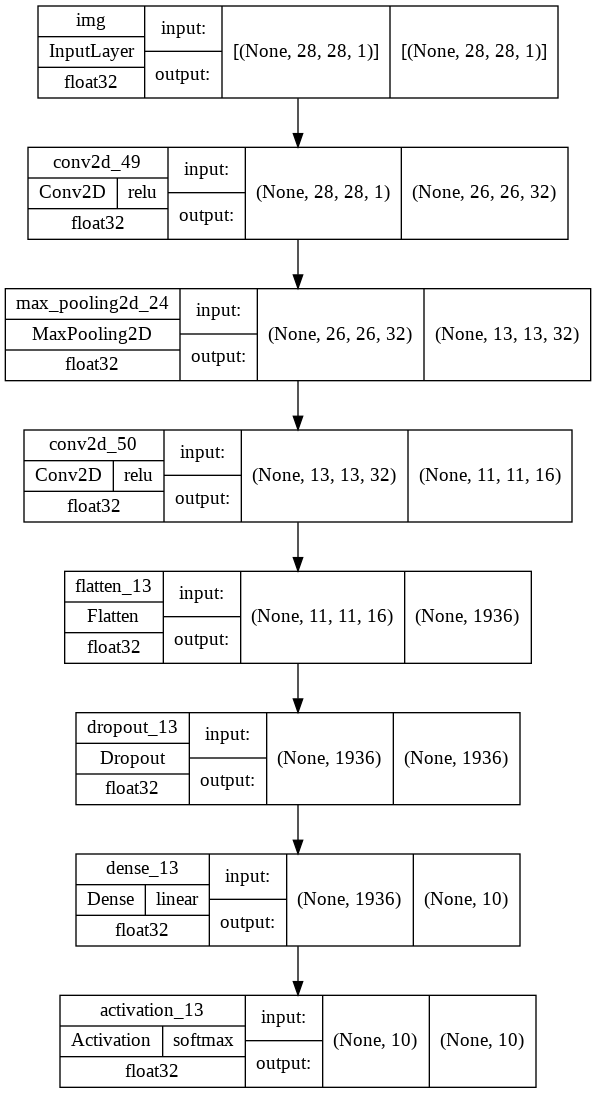

In [63]:
plot_model(model_3,to_file='model_3.png' ,show_shapes=True,show_dtype=True ,show_layer_activations=True)

**Simply put, what happened above, is that I built each model separately from the other with all its parts, except for the training and testing part that I will apply to the assembled model.**

## Now let's complete the compileing and training.

In [64]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
ensemble_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [65]:
# train the ensemble model
history=ensemble_model.fit(x_train, y_train_2, epochs=10, batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 12s 23ms/step - loss: 0.3583 - accuracy: 0.9086
Epoch 2/10
469/469 [==============================] - 11s 23ms/step - loss: 0.1088 - accuracy: 0.9715
Epoch 3/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0751 - accuracy: 0.9794
Epoch 4/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0611 - accuracy: 0.9829
Epoch 5/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0519 - accuracy: 0.9855
Epoch 6/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0439 - accuracy: 0.9880
Epoch 7/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0398 - accuracy: 0.9881
Epoch 8/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0363 - accuracy: 0.9897
Epoch 9/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0325 - accuracy: 0.9902
Epoch 10/10
469/469 [==============================] - 11s 23ms/step - loss: 0.030

In [70]:
_, acc = ensemble_model.evaluate(x_test,
                        y_test_2,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 99.1%


**It looks like we've reduced the overfitting value from the previous project, which you'll find here:
[Simple_CNN_model_for_classification_MNIST_dataset](https://github.com/aly202012/General-Projects/blob/main/Simple_CNN_model_for_classification_MNIST_dataset.ipynb)
 , In the results, we note that the level of accuracy of training reached 99.1%, while the level of accuracy of the test reached 99.1%, the difference between the two is within parts of a hundred.**

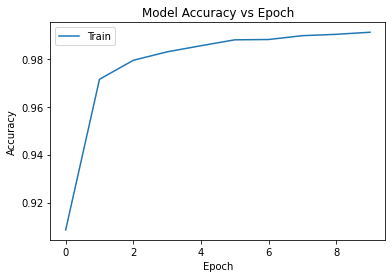

In [71]:
# Print the results on the chart
# Accurasy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

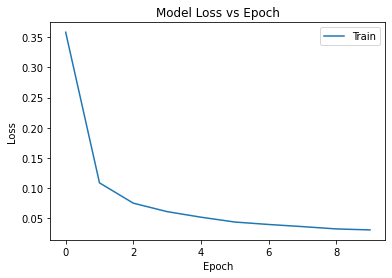

In [72]:
# tracing the path of loss
plt.plot(history.history['loss'])
plt.title('Model Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## **I will stop now to continue later with new tools and techniques.**